# Cours "Géomatique" - GeoPandas 
### Louis Maritaud
### louis.maritaud@unilim.fr

## Objectifs pédagogiques
- Comprendre la structure d'un GeoDataFrame
- Lire et manipuler des fichiers géographiques
- Maîtriser les bases des systèmes de coordonnées (CRS)
- Créer des cartes simples avec matplotlib


# Résumé de ce qu'on a vu 
# Les boucles 
- **for** permet d'itérer sur un nombre défini d'éléments. On peut itérer sur les éléments d'une liste, les caractères d'une chaîne de caractères, etc.
Le code **indenté** sous `for` sera exécuté pour chaque itération.     
**Syntaxe**
```python
for element in objet_sur_lequel_on_itère :
    #code à reproduire pour chaque élément
# Une fois que toutes les itérations sont faites
```

# Les conditions
- **if** permet de définir une condition **initiale**. Si la condition est remplie, le bloc de code indenté est exécuté. Sinon, on passe à la suite.    
**Syntaxe**
```python
if condition : 
    # code qui s'exécute si la condition est remplie
# En dehors de la condition, le code s'exécutera quoi qu'il advienne
```
- **elif** permet de poser une n-ème condition, si celles qui précèdent ne sont pas remplies. elif = else if. elif doit se situer après un if (obligatoire) et potentiellement après d'autres elif. On peut mettre autant d'elif que l'on souhaite.     
**Syntaxe**
```python
if condition_1 :
    # Code à exécuter si la condition est remplie
elif condition_2 :
    # Code à exécuter si condition_1 n'est pas remplie, mais condition_2 est remplie
# En dehors des conditions, le code s'exécutera quoi qu'il advienne
```
- **else** est un **fallback**. Dans le cas où aucune condition n'est remplie dans les if/elif au dessus, le code s'exécutera.     
**Syntaxe**
```python
if condition_1 :
    # Code à exécuter si la condition est remplie
elif condition_2 :
    # Code à exécuter si condition_1 n'est pas remplie, mais condition_2 est remplie
else :
    # Code à exécuter si condition_1 et condition_2 ne sont pas remplies
# En dehors des conditions, le code s'exécutera quoi qu'il advienne 
```

# Les fonctions
On peut réutiliser des morceaux de code sans avoir à les réécrire. On va alors définir une **fonction**.    
Les **paramètres** sont les variables locales à l'intérieur de la fonction, qui sont définies dans sa programmation.     
Lorsqu'on **appelle** la fonction, on lui passe des **arguments** réels qui correspondent aux paramètres.    
La fonction doit **retourner** le résultat de son exécution : c'est la commande `return`

**Syntaxe :**
```python
def nom_fonction(parametre1, parametre2):
    # Code de la fonction
    resultat = parametre1 + parametre2
    return resultat
```

# Deux nouveaux types de données
## Les tuples
Les tuples sont comme des listes, on y trouve un nombre défini d'éléments ordonnés. Seulement, les tuples sont immuables : on ne peut pas les modifier directement. Pour modifier un tuple, il faut réaffecter une variable. Ils s'écrivent entre parenthèse, chaque item les composant étant séparé par une virgule:
```python
tuple_exemple=("ceci","est","un","tuple")
```
Les **coordonnées géographiques** sont la plupart du temps des tuples en Python.
## Les booléns
Les booléens sont très simples, ils n'acceptent que deux valeurs : ```True``` et ```False```. Quand vous testez une condition, c'est un booléen qui est renvoyé.

# Pandas et les DataFrame
La manipulation de tableaux en Python se fait à 98% sous la bibliothèque Pandas.     
Pour utiliser une bibliothèque, il faut **l'importer**, une seule fois dans son code :
```python
import pandas
```

Pour éviter de taper le nom complet de la bibliothèque, on peut lui donner un raccourci. Par convention, on utilise "pd" pour pandas :
```python
import pandas as pd
```

## Quelques commandes très utiles
### Créer un DataFrame à partir d'un dictionnaire :
  ```python
  df = pd.DataFrame(dictionnaire)
  ```
  ----
### Voir les x premières lignes d'un DataFrame appelé df :
  ```python
  df.head(x)
  ```
  ----
### Sélectionner une colonne "colonne" dans le DataFrame df :
  ```python
  df["colonne"]
  ```
  ----
### Filtrer les lignes selon une condition portant sur des valeurs de la colonne "colonne" dans le DataFrame df :
  ```python
  df[df["colonne"] condition]
  # Par exemple : 
  df_recent = df[df["annee"] > 1850] # filtre les données dont la colonne "année" a un chiffre supérieur à 1850
  ```
  ----
### Ajouter une colonne :
  ```python
  df["nouvelle colonne"] = liste_qui_comprend_le_même_nombre_d_items_que_de_lignes_dans_le_df
  ```
  ----
### Trier des données sur une colonne "colonne":
  ```python
    # tri alphabétique ou croissant :
  df_trié = df.sort_values("colonne")
    # tri inversé ;
    df_trié= df.sort_values("colonne", ascending=False)
```
  ----
### Charger un fichier
   ```python
   #fichier csv :
   df = pd.read_csv(
       "donnees.csv",
       sep=";",  # Séparateur (parfois ; au lieu de , => quand votre csv vient d'Excel c'est un point-virgule)
       encoding="utf-8"  # Encodage /!\ IMPORTANT
   )
   #fichier Excel :
   df = pd.read_excel("donnees.xlsx", sheet_name="Feuille1")
   ```     

   ----   
### Enregistrer un fichier :
  ```python
  # csv : 
  df.to_csv("resultat.csv", encoding="utf-8", index=False)  # Sans l'index, sinon ça vous rajoute une colonne
  # Excel :
    df.to_excel("resultat.xlsx", encoding="utf-8", index=False)
```



## Partie Théorique

### 1. Introduction à GeoPandas

**Qu'est-ce que GeoPandas ?**
- Extension de Pandas pour les données géographiques
- Même syntaxe que Pandas + colonne spéciale `geometry`
- Supporte shapefile, GeoJSON, GeoPackage, etc.
- Intégration avec matplotlib pour la visualisation

In [ ]:
# Installation et imports
# Installation (à faire une fois)
# pip install geopandas matplotlib contextily

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Construction d'un DataFrame classique 
df = pd.DataFrame({
    'ville': ['Paris', 'Lyon', 'Marseille', 'Toulouse', 'Limoges'],
    'population': [2103778, 519127, 877215, 514819, 129754], # Données Wikipédia
    'latitude': [48.8566, 45.7640, 43.2965, 43.6048, 45.849998],
    'longitude': [2.3522, 4.8357, 5.3698, 1.4428, 1.25]
})

#Deux manières d'afficher un df dans jupyter : print 
print(f"Notre DataFrame classique : \n{df}")

#ou display (plus joli)
display(df)

In [ ]:
# Conversion en GeoDataFrame
# Créer des géométries Point à partir des coordonnées → points_from_xy
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"  # Système de coordonnées WGS84
)

print(gdf)
print(f"\nColonne geometry :\n{gdf.geometry}")
print(f"\nType de la colonne geometry :{type(gdf.geometry)}")

gdf.plot()
plt.show()


In [ ]:
# Ajout du geojson des régions : 
gdf_regions=gpd.read_file("DATA/regions.geojson").to_crs("EPSG:4326") # On lit le geojson et on en fait un geodataframe
ax = gdf_regions.plot(figsize=(20, 10)) # On créé un premier plot à partir du geojson
gdf.plot(ax=ax, color="black") # On ajout à ce premier plot nos points

## Petit point syntaxe de matplotlib
Dans matplotlib (et geopandas est basé là dessus pour faire des cartes), on définit **deux objets** :
- La **figure** : c'est le carré blanc qui englobe le/les graphiques. Communément, on l'appelle `fg`
- L'**axe** : c'est l'endroit où l'on dessine le graphique. Communément, on l'appelle `ax`.

Dans l'exemple au dessus, on ne définit pas de figure : comme on ne plot qu'un seul axe, on a pas besoin de l'englober dans un ensemble, c'est automatique.

In [ ]:
# Exemple avec deux figures concurrentes : 
# Ajout du geojson des régions : 
gdf_regions=gpd.read_file("DATA/departements.geojson").to_crs("EPSG:4326")



xmin, ymin, xmax, ymax = gdf_regions.total_bounds # On va chercher les valeurs extrêmes pour x et y afin de définir les axes


fig, ax = plt.subplots(1, 2, figsize=(20, 20)) # Syntaxe : plt.subplots(nombre de lignes, nombre de colonnes, taille de figure)

for axe in ax: # Puisqu'on a créé deux axes, on peut itérer dessus
    axe.set_aspect('equal')   # X et Y à la même échelle
    axe.set_xlim(xmin-1, xmax+1)  # limites X identiques → correspondent à la valeur au dessus
    axe.set_ylim(ymin-1, ymax+1)  # limites Y identiques → correspondent à la valeur au dessus
    
# Axe 0 : carte des régions
gdf_regions.plot(ax=ax[0], color="lightgrey", edgecolor="black")   # Puisqu'on a deux axes, on accède à l'axe qu'on vise par son index
ax[0].set_title("Régions")    # Titre de l'axe 1

# Axe 1 : points
gdf.plot(ax=ax[1], color="black", markersize=20) # Accès par l'index + taille de point
ax[1].set_title("Points") # Titre de l'axe 2

plt.tight_layout() # Permet de supprimer les marges autour des axes
plt.show()         # On montre la figure

## Quels types de géométrie pour GéoPandas ? 

- **Point** : un lieu précis (== coordonnée unique)
- **LineString** : une ligne (== succession de points)
- **Polygon** : une surface fermée
- **MultiPoint, MultiLineString, MultiPolygon** : collections de géométries, respectivement plusieurs points ; plusieurs lignes ; plusieurs polygones.

**Exemples :**

In [3]:
from shapely.geometry import Point, LineString, Polygon
import contextily as ctx 

# Géométries en lon/lat
point = Point(2.3522, 48.8566)  # Paris
ligne = LineString([(2.3522, 48.8566), (4.8357, 45.7640)])  # Paris-Lyon

# Polygone autour de Paris
polygone = Polygon([
    (2.2, 48.8),
    (2.6, 48.8),
    (2.4, 49.0)
])

# Création en EPSG:4326
gdf = gpd.GeoDataFrame(
    {'nom': ['Point', 'Ligne', 'Polygone'],
     'geometry': [point, ligne, polygone]},
    crs="EPSG:4326"
)

gdf

,nom,geometry
0,Point,POINT (2.3522 48.8566)
1,Ligne,"LINESTRING (2.3522 48.8566, 4.8357 45.764)"
2,Polygone,"POLYGON ((2.2 48.8, 2.6 48.8, 2.4 49, 2.2 48.8))"


### 3. Systèmes de coordonnées - CRS (Coordinate Reference System)

**Les essentiels à retenir** :

| EPSG Code | Nom | Unité | Usage |
|-----------|-----|-------|-------|
| **4326** | WGS84 | degrés | GPS, **Folium**, coordonnées géographiques |
| **2154** | Lambert 93 | mètres | France, **calculs de distances/aires** |
| **3857** | Web Mercator | mètres | Fonds de carte web (Google Maps, OSM) |

In [ ]:
# Vérifier le CRS actuel
print("CRS actuel :", gdf.crs)

# Changer de projection (reprojection)
gdf_lambert = gdf.to_crs("EPSG:2154")   # On créé une nouvelle variable en projection Lambert
print(f"CRS original : {gdf.crs}")
print(f"CRS après reprojection : {gdf_lambert.crs}")

# Comparaison des coordonnées
print("\nCoordonnées en WGS84 (degrés) :")
print(gdf.geometry.head())

print("\nCoordonnées en Lambert 93 (mètres) :")
print(gdf_lambert.geometry.head())

In [ ]:
# Calcul de distance en WGS84 (FAUX !)
paris = Point(2.3522, 48.8566)
limoges = Point(1.25, 45.849998)
distance_deg = paris.distance(limoges)
print(f"Distance en degrés (incorrect) : {distance_deg:.4f}°")

# Calcul de distance en Lambert 93 (CORRECT !)
gdf_villes = gpd.GeoDataFrame({
    'ville': ['Paris', 'Limoges'],
    'geometry': [paris, limoges]
}, crs="EPSG:4326")

gdf_villes_proj = gdf_villes.to_crs("EPSG:2154")
distance_m = gdf_villes_proj.geometry[0].distance(gdf_villes_proj.geometry[1])
print(f"Distance en mètres (correct) : {distance_m:.1f} m")
#Conversion directe des mètres en kilomètres :
print(f"Distance en kilomètres (correct) : {distance_m/1000:.1f} km")
# Résultat attendu : ~345 km

# EXERCICE 1 
Calculez la distance entre Limoges et Oulu, ville de Finlande.
Les coordonnées des points sont en degré. Pour changer la projection, passez par GeoPandas !

In [2]:
coordonnees = {
    "limoges": (1.25, 45.849998),
    "oulu" : (25.5172719, 64.984683)
}



**Solution**

In [10]:
# On importe les biliothèques
import geopandas as gpd              # Calcul de distance
from shapely.geometry import Point   # Création d'objet "Point"
# On commence par créer des points à partir des coordonnées
limoges = Point(coordonnees["limoges"])    # En appelant dictionnaire["clé"] on retourne la valeur
oulu = Point(coordonnees["oulu"]) 

gdf= gpd.GeoDataFrame({
    "villes":["Limoges", "Oulu"],
    "geometry": [limoges,oulu]},
    crs="EPSG:4326")

gdf=gdf.to_crs("EPSG:2154")               # On reprojette

distance= gdf["geometry"][0].distance(gdf["geometry"][1])   # On utilise la fonction distance sur le premier élément de la colonne geometry de gdf, 
                                                            # avec en argument le deuxième élément de la colonne geometry de gdf
print(distance)

2641415.3675019443


## Cartes simples

In [ ]:
# Cartes simples avec `.plot()` :
# Carte basique
import matplotlib.pyplot as plt # Représentation
import contextily as ctx # Fonds de carte

print(gdf.crs)
# CRS obligatoire
gdf = gdf.to_crs(epsg=3857)

# 
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Tracé des données
gdf.plot(
    ax=ax,  # Taille de la figure
    color='red',        # Couleur
    markersize=100,     # Taille des points
    edgecolor='black',  # Contour
    linewidth=2         # Épaisseur du contour
)

# Fond de carte
ctx.add_basemap(
    ax,
    zoom=6
)

# Finalisation
ax.set_axis_off()
plt.title("Principales villes de France")
plt.show()
print("On va pas se mentir, c'est pas très joli")

# Création d'une "vraie" carte, sans fond

In [ ]:
import geopandas as gpd
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Charger les contours des départements depuis data.gouv.fr

url = "https://www.data.gouv.fr/fr/datasets/r/90b9341a-e1f7-4d75-a73c-bbc010c7feeb"

r = requests.get(url, verify=True) # requests est une bibliothèque qui permet de faire des requêtes html
r.raise_for_status()               # La fonction raise_for_status permet juste de voir si tout s'est bien passé

# Ici, r est le résultat de la requête envoyée à l'URL précédemment donnée en variable str
# Si on affiche le contenu de la requête, on obtiendra 200 → C'est le code qui dit que la connexion a été établie et le contenu téléchargé
# Exactement comme sur vos navigateurs. Les codes 502 (Bad gateway) ou 404 (not found) sont le même genre de codes renvoyés par des requêtes html.

with open("DATA/departements.geojson", "wb") as file : # La commande with permet d'effectuer le bloc de code avec la condition réalisée.
    file.write(r.content)                              # Ici, on ouvre (open) un fichier dont on spécifie le chemin d'accès en str, le mode d'ouverture (wb = write binary) et on l'affecte à une variable "file" grâce à as
    # .write est une méthode qui permet d'écrire quelque chose dans un fichier ; ici on écrit le "content" de r qui correspond au contenu renvoyé par la requête html.

with open("DATA/departements.geojson", "r", encoding="utf-8") as file: # Même opération qu'au dessus, sauf qu'on lit le fichier ('r' = read ; encoding spécifie l'encodage des données)
    departements = gpd.read_file(file)          # On créé la variable departements en tant que géodataframe en lisant le fichier ouvert dans la variable file
departements=departements.to_crs("EPSG:2154")   # la variable existe, on peut changer son crs 

# Charger les données de populations prises sur le site de l'INSEE
df_pop=pd.read_csv("DATA/donnees_departements.csv", encoding="utf-8", sep=";")

df_pop["nom"]=df_pop["Département"]
departements=pd.merge(departements, df_pop, on="nom")


# Explorer les données
print("Premières lignes :")
print(departements.head())

print("\nColonnes disponibles :")
print(departements.columns)

print(f"\nSystème de coordonnées : {departements.crs}")
print(f"Nombre de départements : {len(departements)}")

# Types de géométries
print("\nTypes de géométries :")
print(departements.geometry.type.value_counts())

# Tracer les données sans rien spécifier
departements.plot() # On trace
plt.title("Départements français", fontsize=16) # On définit un tite, avec la taille de police
plt.axis('off') # On enlève les axes

In [ ]:
# Carte de France simple
fig, ax = plt.subplots(figsize=(12, 12))
departements.plot(ax=ax, edgecolor='black', facecolor='lightblue')
plt.title("Départements français", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Afficher quelques noms de départements
print("\nPremiers départements :")
print(departements['nom'].head(15))



# Statistiques sur les géométries
print(f"\nSuperficie totale : {departements.geometry.area.sum()/1_000_000  :.2f} km²")

# EXERCICE 2
Vous allez tracer la carte du Brésil et de ses régions à partir du json contenu dans `DATA/br.json`

In [ ]:
# Votre code ici


**Solution**

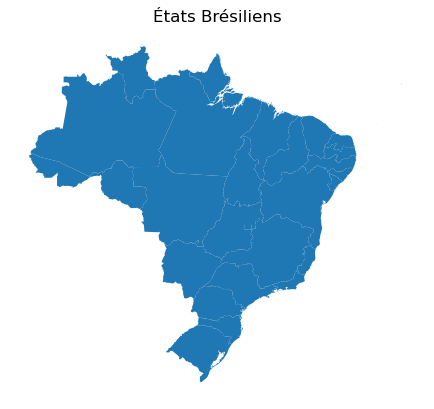

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file("DATA/br.json")

gdf.plot()
plt.axis("off")
plt.title("États Brésiliens")
plt.show()

# Ce qu'on a vu 
## Faire une carte simple avec Geopandas et Matplotlib
### Geopandas
Comme toutes les bibliothèques, pour s'en servir il faut l'importer. Pour aller plus vite, on peut donner un alias à une bibliothèque, en écrivant ```import bibliothèque as alias```    
```python
import geopandas as gpd
```
Geopandas permet de créer et manipuler un **GeoDataFrame**.    
Un GeoDataFrame est un tableau (= DataFrame) qui contient des informations géographiques dans une colonne ```geometry```    
On peut y trouver des **Points**, des **Lignes**, des **Polygones** et des combinaisons de tout ce qui a été dit précédemment.    
Pour créer ces objets, on peut utiliser shapely.geometry : 
```python
from shapely.geometry import Point, LineString, Polygon
```

| Nom  | Nom pour gpd |Méthode avec shapely| Type d'arguments |
|------|--------------|-| -|
|Points|POINT|```Point(x, y)```|deux floats|
|Lignes|LINESTRING|```LineString([(x,y), (x,y)])```|liste de tuples comprenant deux floats|
|Polygones|POLYGON|```Polygon([(x,y), (x,y), (x,y)])```|liste de tuples comprenant deux floats|

#### Pour créer un GeoDataFrame : 
```python
gdf = gdp.GeoDataFrame()
```
On peut créer un gdf sur la base d'un df : 
```python
df=pd.DataFrame({
    "villes":["Paris","Lyon","Tokyo"],
    "lon" : [x, x, x],
    "lat": [y, y, y]
})

gdf=gdp.GeoDataFrame(
    df,
    geometry=gdp.points_from_xy(df["lon"], df["lat"]),
    crs="EPSG:XXXX"
)
```
L'argument "crs" est le système de projection.
### Systèmes de coordonnées - CRS (Coordinate Reference System)

**Les essentiels à retenir** :

| EPSG Code | Nom | Unité | Usage |
|-----------|-----|-------|-------|
| **4326** | WGS84 | degrés | GPS, **Folium**, coordonnées géographiques |
| **2154** | Lambert 93 | mètres | France, **calculs de distances/aires** |
| **3857** | Web Mercator | mètres | Fonds de carte web (Google Maps, OSM) |

**Reprojeter dans un crs différent**
Sur un GeoDataFrame : 
```python
gdf = gdf.to_crs(epsg=EPSG CODE)
```
**Exemple pour reprojeter en Lambert 93 :**
```python
gdf = gdf.to_crs(epsg=2154)
```

## Matplotlib

Dans matplotlib (et geopandas est basé là dessus pour faire des cartes dans notre cours), on définit **deux objets** :
- La **figure** : c'est le carré blanc qui englobe le/les graphiques. Communément, on l'appelle `fg`
- L'**axe** : c'est l'endroit où l'on dessine le graphique. Communément, on l'appelle `ax`.
```python
fig, ax = plt.subplots(1, 2, figsize=(20, 20)) # Syntaxe : plt.subplots(nombre de lignes, nombre de colonnes, taille de figure)
# Tracé des données
gdf.plot(
    ax=ax,              # On trace sur l'axe
    color='red',        # Couleur
    markersize=100,     # Taille des points
    edgecolor='black',  # Contour
    linewidth=2         # Épaisseur du contour
)
ax.set_axis_off()       # On retire les axes
plt.title("Titre")      # On donne un titre à la carte
plt.show()              # On affiche la carte
```
